In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [5]:
train_images, train_labels = loadlocal_mnist(images_path='C:/Users/LENOVO/Test/emnist_source_files/emnist-mnist-train-images-idx3-ubyte',
                                             labels_path='C:/Users/LENOVO/Test/emnist_source_files/emnist-mnist-train-labels-idx1-ubyte')

In [6]:
test_images, test_labels = loadlocal_mnist(images_path='C:/Users/LENOVO/Test/emnist_source_files/emnist-mnist-test-images-idx3-ubyte',
                                           labels_path='C:/Users/LENOVO/Test/emnist_source_files/emnist-mnist-test-labels-idx1-ubyte')

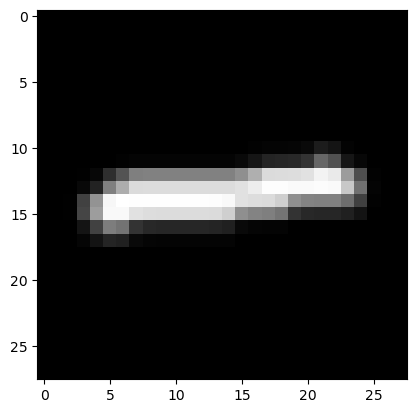

In [7]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [8]:
train_labels[1]

1

In [9]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [10]:
feature.shape

(144,)

<BarContainer object of 144 artists>

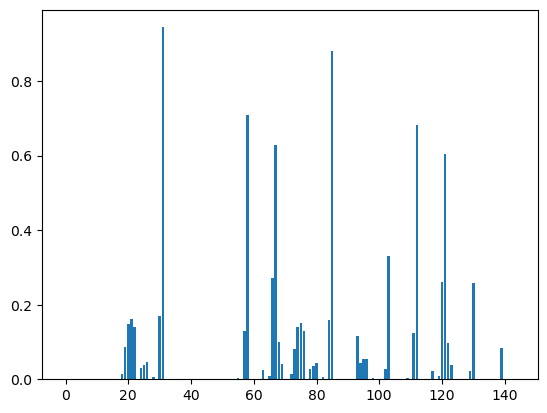

In [11]:
plt.bar(list(range(feature.shape[0])), feature)

In [12]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

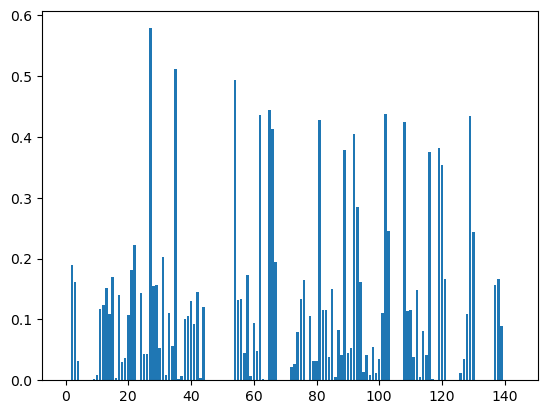

In [13]:
plt.bar(list(range(feature.shape[0])), feature)

In [14]:
n_dims = feature.shape[0]

In [15]:
n_dims

144

In [16]:
n_samples = train_images.shape[0]

In [17]:
n_samples

60000

In [18]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [19]:
X_train.shape

(60000, 144)

In [20]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

In [21]:
from sklearn.preprocessing import LabelBinarizer

In [22]:
lb = LabelBinarizer()

In [23]:
lb.fit(y_train)

LabelBinarizer()

In [24]:
y_train_one_hot = lb.transform(y_train)

In [25]:
y_train_one_hot[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [26]:
y_train[0]

4

In [27]:
import numpy as np

In [28]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [29]:
label[0]

4

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [31]:
clf.fit(X_train, y_train_one_hot)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

In [32]:
n_samples = test_images.shape[0]

In [33]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [34]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [35]:
y_test_one_hot = lb.transform(y_test)

In [36]:
y_pred_one_hot = clf.predict(X_test)

In [37]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [38]:
y_pred

array([1, 8, 6, ..., 8, 9, 6])

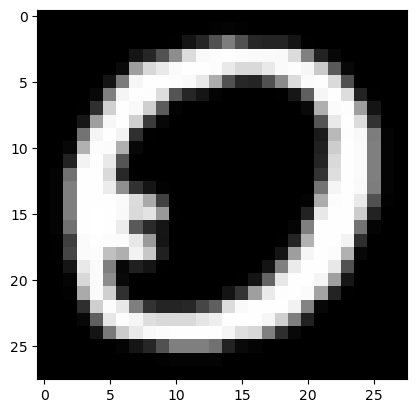

In [39]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [40]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [41]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [42]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [43]:
out[0]

0

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
conf_mat = confusion_matrix(y_test, y_pred)

In [46]:
conf_mat

array([[998,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  9, 980,   4,   0,   3,   0,   1,   1,   2,   0],
       [ 27,   0, 953,   7,   2,   1,   0,   4,   5,   1],
       [ 25,   0,  11, 955,   0,   4,   0,   0,   3,   2],
       [ 23,   3,   1,   0, 963,   0,   0,   0,   0,  10],
       [ 10,   0,   0,  11,   1, 974,   3,   0,   0,   1],
       [ 14,   0,   4,   0,   0,   3, 979,   0,   0,   0],
       [ 15,   0,   6,   5,   4,   0,   0, 964,   1,   5],
       [ 32,   6,   2,   7,   2,   4,   2,   0, 943,   2],
       [ 24,   0,   0,   3,   1,   4,   0,   6,   2, 960]], dtype=int64)

In [47]:
from mlxtend.plotting import plot_confusion_matrix

In [48]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

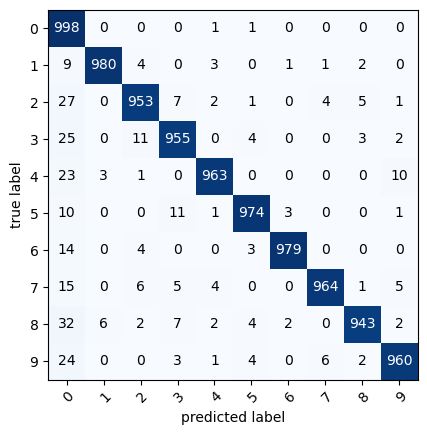

In [49]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

In [50]:
from sklearn.metrics import precision_score

In [51]:
precision = precision_score(y_test, y_pred, average=None)

In [52]:
precision

array([0.84791844, 0.9908999 , 0.9714577 , 0.96659919, 0.98567042,
       0.98284561, 0.99390863, 0.98871795, 0.98640167, 0.97859327])

In [53]:
from sklearn.metrics import recall_score

In [54]:
recall = recall_score(y_test, y_pred, average=None)

In [55]:
recall

array([0.998, 0.98 , 0.953, 0.955, 0.963, 0.974, 0.979, 0.964, 0.943,
       0.96 ])

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(y_test, y_pred)

In [58]:
accuracy

0.9669

In [59]:
from sklearn.metrics import f1_score

In [60]:
f1 = f1_score(y_test, y_pred, average='macro')

In [61]:
f1

0.9673809608683573

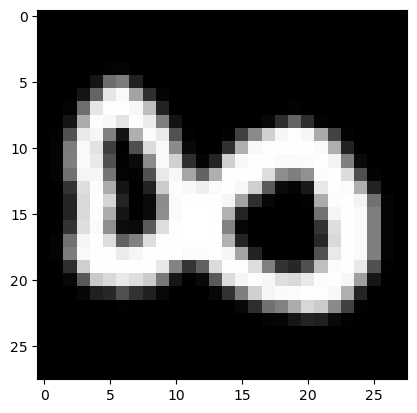

In [62]:
plt.imshow(test_images[4].reshape(28,28), cmap='gray')

In [63]:
out_one_hot = clf.predict(X_test[4].reshape(1, n_dims))

In [64]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [65]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [66]:
out[0]

8

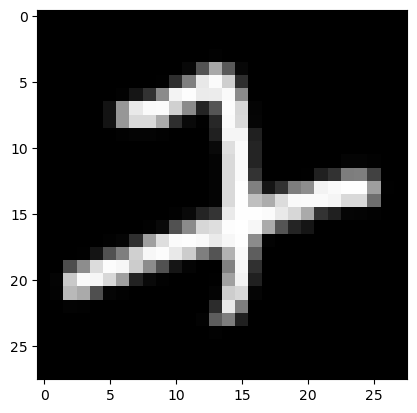

In [67]:
plt.imshow(test_images[15].reshape(28,28), cmap='gray')

In [68]:
out_one_hot = clf.predict(X_test[15].reshape(1, n_dims))

In [69]:
out_one_hot

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [70]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [71]:
out[0]

4

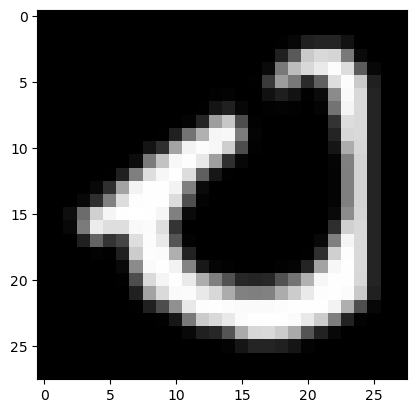

In [72]:
plt.imshow(test_images[28].reshape(28,28), cmap='gray')

In [73]:
out_one_hot = clf.predict(X_test[28].reshape(1, n_dims))

In [74]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [75]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [76]:
out[0]

0

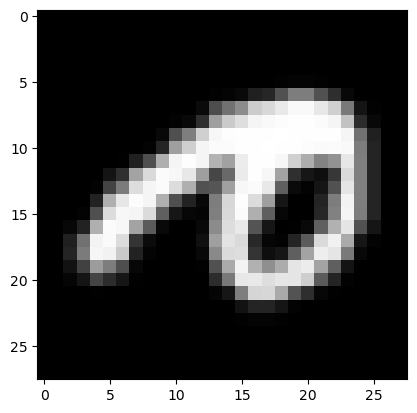

In [77]:
plt.imshow(test_images[2].reshape(28,28), cmap='gray')

In [78]:
out_one_hot = clf.predict(X_test[2].reshape(1, n_dims))

In [79]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [80]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [81]:
out[0]

6

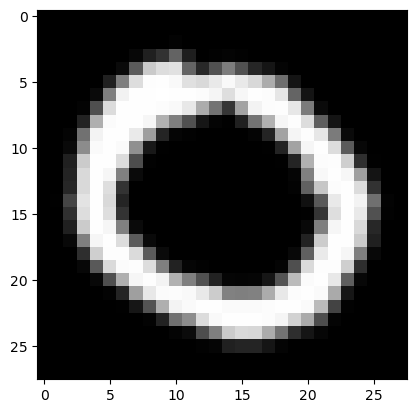

In [82]:
plt.imshow(test_images[5].reshape(28,28), cmap='gray')

In [83]:
out_one_hot = clf.predict(X_test[5].reshape(1, n_dims))

In [84]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [85]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [86]:
out[0]

0

In [87]:
out[0]

0

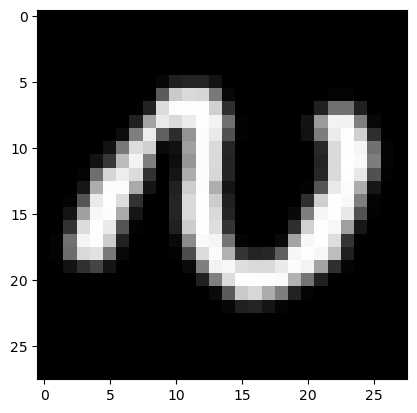

In [88]:
plt.imshow(test_images[17].reshape(28,28), cmap='gray')

In [89]:
out_one_hot = clf.predict(X_test[17].reshape(1, n_dims))

In [90]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [91]:
out[0]

5

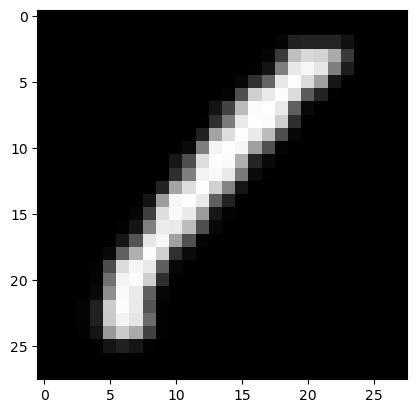

In [92]:
plt.imshow(test_images[10].reshape(28,28), cmap='gray')

In [93]:
out_one_hot = clf.predict(X_test[10].reshape(1, n_dims))

In [94]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [95]:
out[0]

0

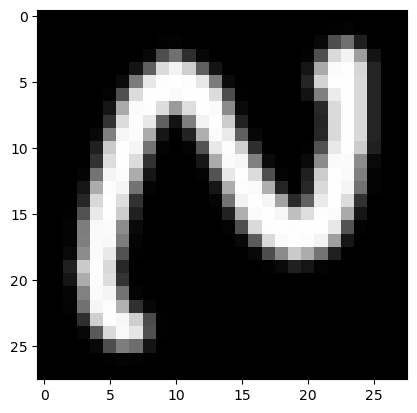

In [96]:
plt.imshow(test_images[18].reshape(28,28), cmap='gray')

In [97]:
out_one_hot = clf.predict(X_test[18].reshape(1, n_dims))

In [98]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [99]:
out[0]

5